In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from src.dw import *
pd.options.mode.chained_assignment = None #Supress false positive warning in helper function
import datetime as dt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
wa_county_tot_dry = pd.read_csv('data/drought_wa_county_cat_per.csv')
wa_county_tot_dry.head()

wa_county_tot_dry['MapDate'] = pd.to_datetime(wa_county_tot_dry['MapDate'], format='%Y%m%d')
wa_county_tot_dry.set_index('MapDate', inplace=True)
wa_county_tot_dry.tail()


,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
MapDate,,,,,,,,,,,,
2000-02-01,53077,Yakima County,WA,100.0,0.0,0.0,0.0,0.0,0.0,2000-02-01,2000-02-07,2
2000-01-25,53077,Yakima County,WA,100.0,0.0,0.0,0.0,0.0,0.0,2000-01-25,2000-01-31,2
2000-01-18,53077,Yakima County,WA,100.0,0.0,0.0,0.0,0.0,0.0,2000-01-18,2000-01-24,2
2000-01-11,53077,Yakima County,WA,100.0,0.0,0.0,0.0,0.0,0.0,2000-01-11,2000-01-17,2
2000-01-04,53077,Yakima County,WA,100.0,0.0,0.0,0.0,0.0,0.0,2000-01-04,2000-01-10,2


In [96]:
#top 5 agrarian counties in WA, according to 2017 USDA Census of Agriculture State Profile for WA

yakima_drought = county_drought(wa_county_tot_dry, 'Yakima County') #1.8 mil acres of farmland
whitman_drought = county_drought(wa_county_tot_dry, 'Whitman County') #1.3 mil acres of farmland
okanogan_drought = county_drought(wa_county_tot_dry, 'Okanogan County') #1.23 mil acres of farmland
lincoln_drought = county_drought(wa_county_tot_dry, 'Lincoln County') #1.2 mil acres of farmland
grant_drought = county_drought(wa_county_tot_dry, 'Grant County') #1 mil acres of farmland

In [97]:
yakima_drought

,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,any_drought
MapDate,,,,,,,,,,,,,
2020-03-31,53077,Yakima County,WA,8.3,37.18,13.99,40.53,0.0,0.0,2020-03-31,2020-04-06,2,54.52
2020-03-24,53077,Yakima County,WA,8.3,37.18,54.52,0.00,0.0,0.0,2020-03-24,2020-03-30,2,54.52
2020-03-17,53077,Yakima County,WA,8.3,37.18,54.52,0.00,0.0,0.0,2020-03-17,2020-03-23,2,54.52
2020-03-10,53077,Yakima County,WA,8.3,37.18,54.52,0.00,0.0,0.0,2020-03-10,2020-03-16,2,54.52
2020-03-03,53077,Yakima County,WA,8.3,37.18,54.52,0.00,0.0,0.0,2020-03-03,2020-03-09,2,54.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-02-01,53077,Yakima County,WA,100.0,0.00,0.00,0.00,0.0,0.0,2000-02-01,2000-02-07,2,0.00
2000-01-25,53077,Yakima County,WA,100.0,0.00,0.00,0.00,0.0,0.0,2000-01-25,2000-01-31,2,0.00
2000-01-18,53077,Yakima County,WA,100.0,0.00,0.00,0.00,0.0,0.0,2000-01-18,2000-01-24,2,0.00


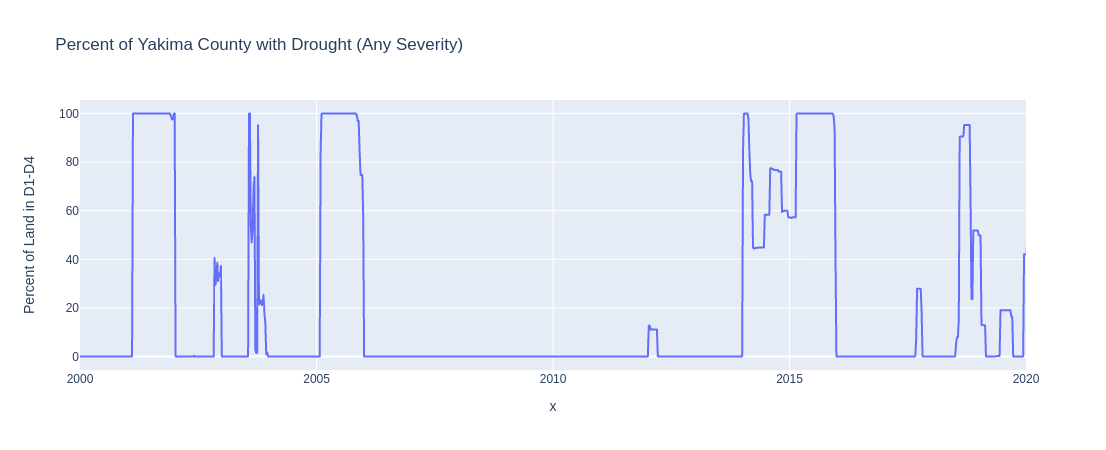

In [41]:
fig = plot_any_drought(yakima_drought)
fig.show()

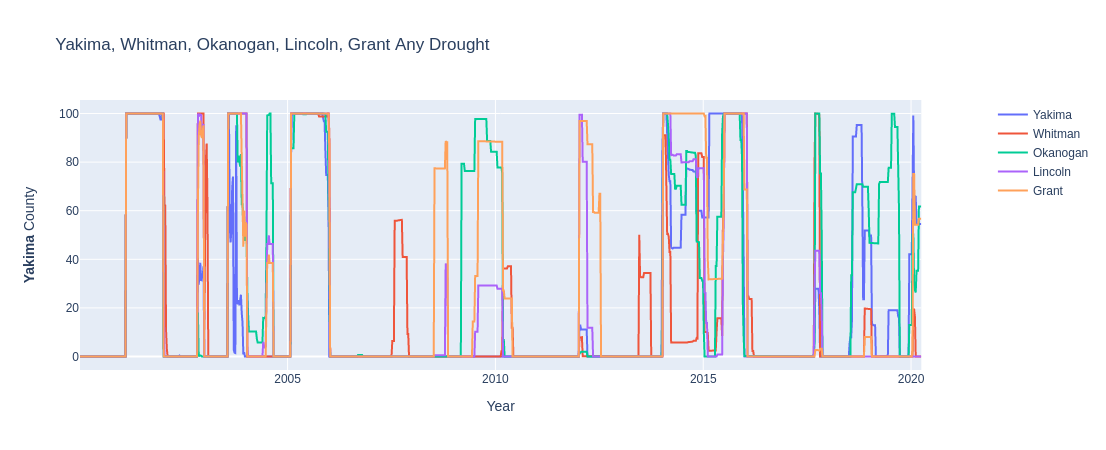

In [51]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=yakima_drought.index, y=yakima_drought['any_drought'], name="Yakima"),
    secondary_y=False
)

fig.add_trace(
    go.Scatter(x=whitman_drought.index, y=whitman_drought['any_drought'], name="Whitman"),
    secondary_y=False
)


fig.add_trace(
    go.Scatter(x=okanogan_drought.index, y=okanogan_drought['any_drought'], name="Okanogan"),
    secondary_y=False
)

fig.add_trace(
    go.Scatter(x=lincoln_drought.index, y=lincoln_drought['any_drought'], name="Lincoln"),
    secondary_y=False
)

fig.add_trace(
    go.Scatter(x=grant_drought.index, y=grant_drought['any_drought'], name="Grant"),
    secondary_y=False
)
fig.update_layout(
    title_text="Yakima, Whitman, Okanogan, Lincoln, Grant Any Drought"
)

fig.update_xaxes(title_text="Year")

fig.update_yaxes(title_text="<b>Yakima</b> County", secondary_y=False)
fig.update_yaxes(title_text="<b>Whitman</b> County", secondary_y=True)
                                 
fig.show()

                                          

In [54]:
# make snapshots of time periods of interest 2000-2007, 2007-2010, 2012, 2015 whole state in drought

In [107]:
yakima_year_mean = mean_drought_time(yakima_drought, yakima_drought.index.year)

In [108]:
yakima_year_mean

,None,D0,D1,D2,D3,D4
MapDate,,,,,,
2000,96.314231,3.685769,0.000000,0.000000,0.000000,0.0
2001,5.769231,5.885769,32.588654,55.756538,0.000000,0.0
2002,50.765660,42.136226,6.432453,0.665472,0.000000,0.0
2003,40.391923,44.877692,14.730577,0.000000,0.000000,0.0
2004,74.144423,25.855577,0.000000,0.000000,0.000000,0.0
2005,0.883462,9.825385,16.213077,56.908462,16.169231,0.0
2006,90.445385,9.554615,0.000000,0.000000,0.000000,0.0
2007,75.204231,24.795769,0.000000,0.000000,0.000000,0.0
2008,70.964340,29.035660,0.000000,0.000000,0.000000,0.0


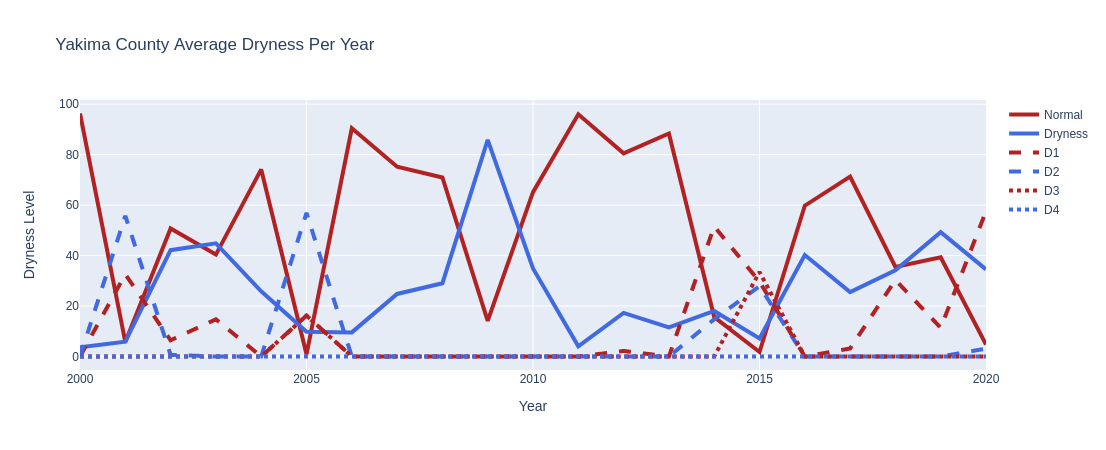

In [118]:
plot_dry_levels(yakima_year_mean, 'Yakima', 'Year')

In [134]:
#update function to be mean and plot?
yakima_month_mean = mean_drought_time(yakima_drought, yakima_drought.index.month)
yakima_month_mean['MapDate'].

,None,D0,D1,D2,D3,D4
MapDate,,,,,,
1,53.453404,33.644787,11.352021,1.549681,0.000000,0.0
2,55.388000,25.070000,19.088235,0.454000,0.000000,0.0
3,55.818696,22.891630,15.670543,5.619022,0.000000,0.0
4,67.878372,15.571744,10.908605,3.738488,1.902791,0.0
5,66.149111,16.294333,6.404333,9.333889,1.818222,0.0
6,60.846071,20.926786,4.597738,13.629405,0.000000,0.0
7,45.944222,33.796889,4.696333,14.852778,0.709778,0.0
8,40.793636,33.068295,10.692500,11.976023,3.469659,0.0
9,37.752353,34.573765,10.970706,8.657647,8.045412,0.0


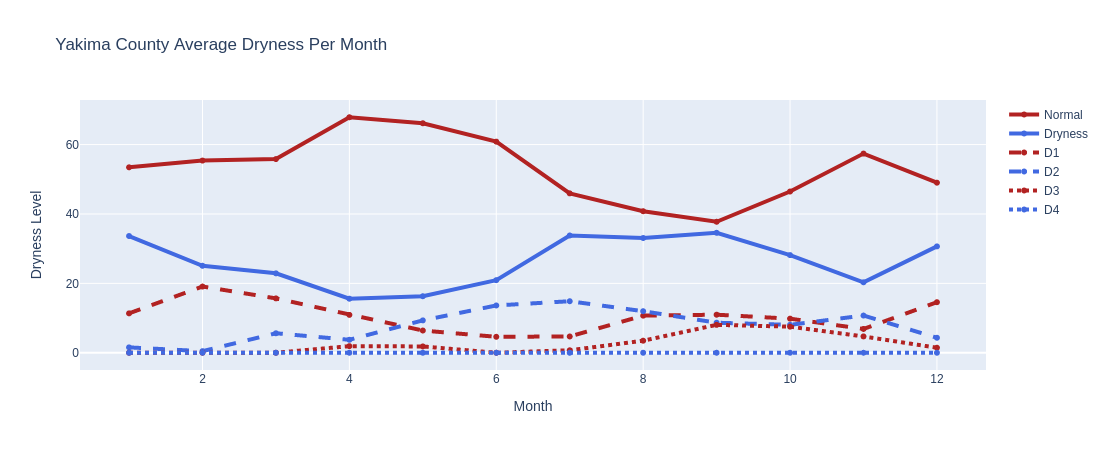

In [133]:
plot_dry_levels(yakima_month_mean, 'Yakima', 'Month')

#change names to month names

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']